In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from bayeshist import bayesian_histogram, plot_bayesian_histogram
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 
import sys
sys.path.append('/home/monte.flora/python_packages/scikit-explain/')
import skexplain 
from scipy.stats import spearmanr, kendalltau

In [2]:
n_samples = 1000000
n_vars = 2
X = np.stack([np.random.normal(0,1,size=n_samples) for _ in range(n_vars)], axis=-1)
X = pd.DataFrame(X, columns=[f'X{i}' for i in range(n_vars)])
coefs = [1.0, 1.0] 
y = X.dot(coefs)  
y = np.where(y>0, 1, 0)

In [3]:
np.mean(y)

0.499777

In [4]:
data = X['X1']
bin_edges, beta_dist = bayesian_histogram(data, y)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
base_rate = beta_dist.median()

In [5]:
model = LogisticRegression().fit(X,y)
explainer = skexplain.ExplainToolkit(('LR', model), X, y)
ale = explainer.ale(features='all', n_bins=50)

ALE Numerical Features: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


KendalltauResult(correlation=0.9999999999999998, pvalue=3.287949416633158e-63)


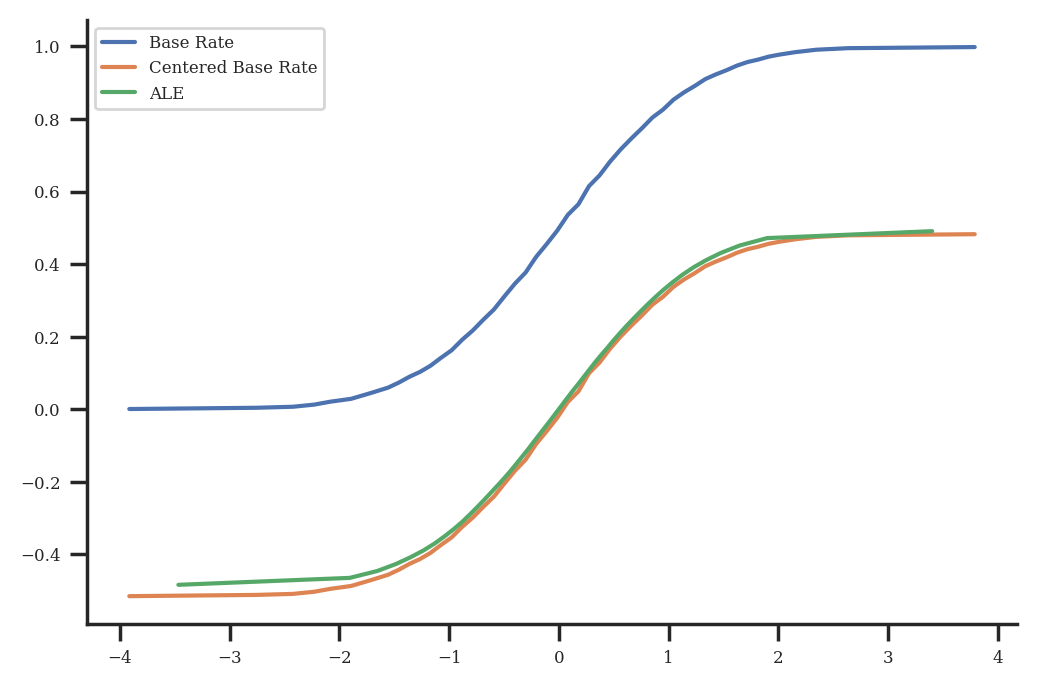

In [8]:
f, ax = plt.subplots(dpi=200)
ax.plot(bin_centers, base_rate, label='Base Rate' )
ax.plot(bin_centers, base_rate-np.mean(base_rate), label='Centered Base Rate' )
ax.plot(ale['X1__bin_values'], ale['X1__LR__ale'][0,:], label='ALE')

tau = kendalltau(ale['X1__LR__ale'][0,:][:-1], base_rate-np.mean(base_rate))
print(tau)
ax.legend()